# Car prediction using Machine Learning

# Introduction:

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning.

# Tools and Libraries:

- Python
- Jupyter Notebook
- Scikit-learn
- Pandas
- NumPy
- Matplotlib

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold

C:\Users\Professor\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# Data Understanding:

In [2]:
df=pd.read_csv('car data.csv')
display(df)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
print('Checkingnthe missing values from the dataset: \n \n',df.isnull().sum())

Checkingnthe missing values from the dataset: 
 
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [4]:
print('Checking the size of the dataset: \n',df.shape)

Checking the size of the dataset: 
 (301, 9)


# Preprocessing

 Encoding different columns with label encoder and ordinal encoder respectively

In [5]:
#Encoding 'previous_application.csv'
encoded_df= df.copy()

# Encoding different columns (With label encoder)
label_enc=['Fuel_Type','Selling_type','Transmission','Car_Name']
label_encoder = LabelEncoder()

for column in label_enc:
    encoded_value= label_encoder.fit_transform(encoded_df[column])
    encoded_df[column]= encoded_value

#Encoding different columns (with ordinal encoder)
all_mapping={'Year':{2003:0, 2004:1, 2005:2,2006:3,2007:4,2008:5,2009:6,2010:7,2011:8,2012:9,2013:10,2014:11,2015:12,2016:13,2017:14,2018:15}}

for column in all_mapping:
    mapping= all_mapping[column]
    ordinal_encoder= OrdinalEncoder(categories =[list(mapping.keys())])
    encoded_df[column]= ordinal_encoder.fit_transform(encoded_df[[column]])
    
    
display(encoded_df.head())

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,90,11.0,3.35,5.59,27000,2,0,1,0
1,93,10.0,4.75,9.54,43000,1,0,1,0
2,68,14.0,7.25,9.85,6900,2,0,1,0
3,96,8.0,2.85,4.15,5200,2,0,1,0
4,92,11.0,4.60,6.87,42450,1,0,1,0


# Exploratory Data Analysis

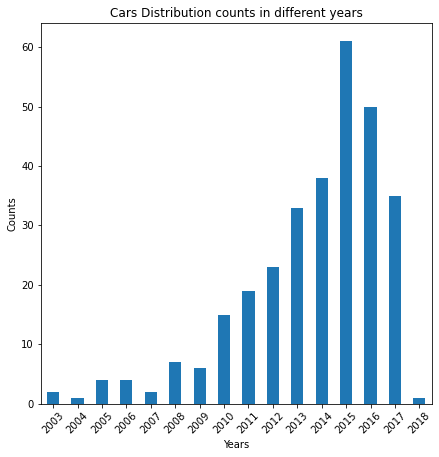

In [6]:
years_counts=df['Year'].value_counts().sort_index(ascending=True)
plt.figure(figsize=(7,7))
years_counts.plot(kind='bar')
plt.xlabel('Years')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.title('Cars Distribution counts in different years')
plt.show()



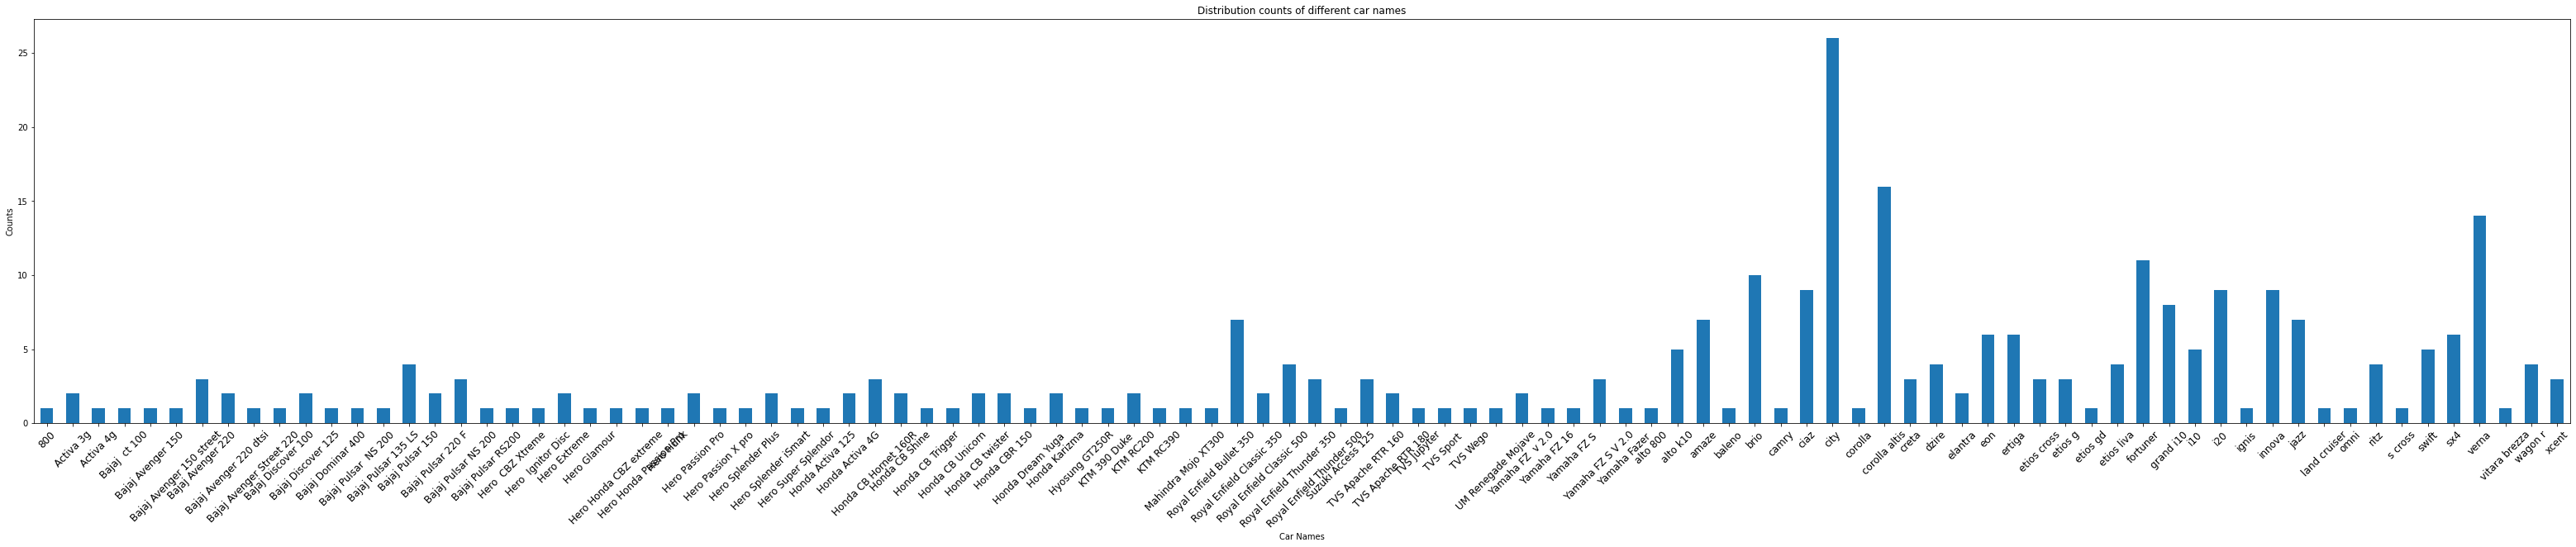

In [7]:
car_Name_counts=df['Car_Name'].value_counts().sort_index(ascending=True)
plt.figure(figsize=(55,9))
car_Name_counts.plot(kind='bar')
plt.xlabel('Car Names')
plt.ylabel('Counts')
plt.xticks(rotation=45, fontsize=12)
plt.title('Distribution counts of different car names')
plt.show()

**click on the above plot for full view or zoom**

<ipython-input-8-4e163bee4b05>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,0].set_xticklabels(df['Fuel_Type'].value_counts().index, rotation=45)
<ipython-input-8-4e163bee4b05>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,1].set_xticklabels(df['Selling_type'].value_counts().index, rotation=45)
<ipython-input-8-4e163bee4b05>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,0].set_xticklabels(df['Transmission'].value_counts().index, rotation=45)
<ipython-input-8-4e163bee4b05>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(owner_string, rotation=45)


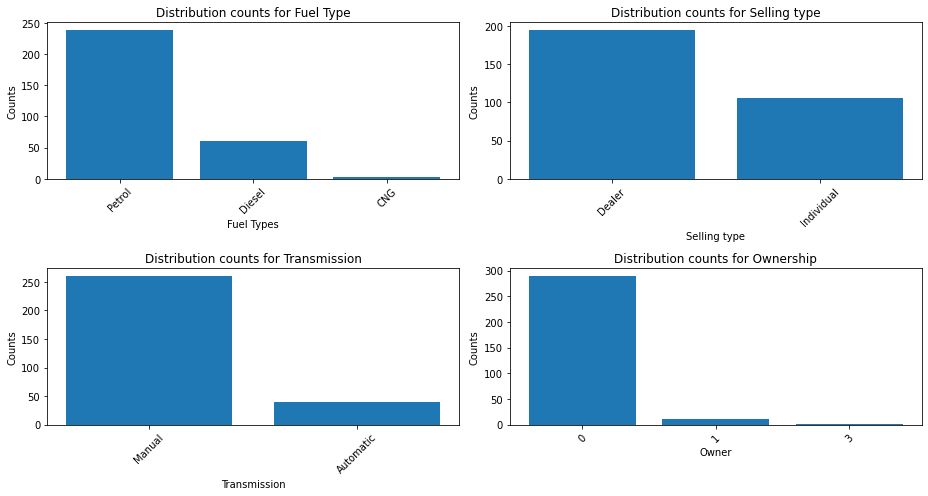

In [8]:
fig, axs=plt.subplots(2,2,figsize=(13,7))

axs[0,0].bar(df['Fuel_Type'].value_counts().index, df['Fuel_Type'].value_counts().values)
axs[0,0].set_title('Distribution counts for Fuel Type')
axs[0,0].set_xlabel('Fuel Types')
axs[0,0].set_ylabel('Counts')
axs[0,0].set_xticklabels(df['Fuel_Type'].value_counts().index, rotation=45)


axs[0,1].bar(df['Selling_type'].value_counts().index, df['Selling_type'].value_counts().values)
axs[0,1].set_title('Distribution counts for Selling type')
axs[0,1].set_xlabel('Selling type')
axs[0,1].set_ylabel('Counts')
axs[0,1].set_xticklabels(df['Selling_type'].value_counts().index, rotation=45)

axs[1,0].bar(df['Transmission'].value_counts().index, df['Transmission'].value_counts().values)
axs[1,0].set_title('Distribution counts for Transmission')
axs[1,0].set_xlabel('Transmission')
axs[1,0].set_ylabel('Counts')
axs[1,0].set_xticklabels(df['Transmission'].value_counts().index, rotation=45)



#convert list of numbers into a list of string to ensure the x labels is interpreted as classes
owner_labels= df['Owner'].value_counts().index
owner_string = []

for i in owner_labels:
    owner_string.append(str(i))
    
    
axs[1,1].bar(owner_string, df['Owner'].value_counts().values)
axs[1,1].set_title('Distribution counts for Ownership')
axs[1,1].set_xlabel('Owner')
axs[1,1].set_ylabel('Counts')
axs[1,1].set_xticklabels(owner_string, rotation=45)

plt.tight_layout() #prevent overlap of subplots

plt.show()


# Model Training: Split the dataset into training and testing sets

In [9]:
X=encoded_df.drop(columns=['Present_Price'])
y=encoded_df['Present_Price']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

# Model training, selection and evaluation:

In [10]:
model=RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)


# Define the number of folds for cross-validation
num_folds = 5

# Define the cross-validation technique (e.g., KFold)
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean Score:", scores.mean())
print("Standard Deviation of Scores:", scores.std())


y_pred= model.predict(X_test)

performance= r2_score(y_test,y_pred)

print(performance)




Cross-Validation Scores: [0.88362163 0.64474976 0.89015532 0.81739128 0.91854143]
Mean Score: 0.8308918847024882
Standard Deviation of Scores: 0.098798966808272
0.860081389924831


# Model Optimization:

In [11]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define GridSearchCV with the specified model, parameter grid, and cross-validation technique
grid_search = GridSearchCV(model, param_grid, cv=kf, scoring='r2')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Print the best hyperparameters found
best_parameters=grid_search.best_params_
print("Best Hyperparameters:", best_parameters)


best_model = RandomForestRegressor(**best_parameters, random_state=42)

# Train the model on the training data
best_model.fit(X_train, y_train)


# Evaluate the model on the testing data
score = best_model.score(X_test, y_test)

# Print the R-squared score
print("R-squared Score on Test Data:", score)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
R-squared Score on Test Data: 0.8830050214021338
